Week 7 · Day 1 — Convolutions & Pooling Intuition
Why this matters

Convolutions are the building block of modern computer vision. Instead of looking at the whole image at once, CNNs learn local patterns (edges, corners, textures) through filters. Pooling helps compress information while keeping the most important features.

Theory Essentials

Convolution = sliding a filter (kernel) over an image to detect patterns.

Kernel/Filter: small matrix (e.g., 3×3) applied across the input.

Stride: how many pixels the filter moves at each step.

Padding: adding borders so the output size doesn’t shrink too much.

Feature map: the transformed image after applying filters.

Pooling: downsampling to reduce size (max-pooling keeps strongest signal).



### 🧠 What CNNs Are

* A **Convolutional Neural Network (CNN)** is a neural net specialized for images.
* Instead of connecting every pixel to every neuron (like in dense nets), it uses **filters** (tiny sliding windows) to detect **local patterns** such as edges, curves, or textures.
* These local patterns combine layer by layer → eventually forming **high-level concepts** like “eye,” “wheel,” or “cat.”

---

### ⚙️ How Convolution Works

Imagine you have a grayscale image (matrix of numbers = pixel intensities).

1. Take a **filter (kernel)**, e.g., a 3×3 matrix.
2. Place it on the top-left corner of the image. Multiply numbers elementwise and sum.
3. Slide the filter (stride) across the image → build a **feature map** (new matrix).
4. Different filters learn to detect different things (vertical edges, diagonals, textures).

This works because **images have local structure** — nearby pixels are related. A car edge in one place looks like a car edge in another.

---

### 📏 Important Concepts

* **Stride**: step size of the filter. Larger stride = smaller output.
* **Padding**: adding zeros around image edges so filters can scan the borders.
* **Feature map**: result of applying one filter. A CNN layer usually learns dozens/hundreds of filters.

---

### 🏞️ Pooling (Why?)

* Images are big → too many pixels.
* **Pooling reduces size** but keeps key signals.

  * **Max-pooling** (most common): take the max in a 2×2 window (keeps strongest feature).
  * **Average pooling**: take average (less common).
* Benefit: reduces computation, makes features more invariant to small shifts (e.g., cat moves a bit → still recognized).

---

### 🧩 Why CNNs Beat Dense Nets

* **Dense nets** don’t know that pixels next to each other are related — they just see a long list of numbers.
* **CNNs exploit spatial structure**: nearby pixels matter, faraway ones less so.
* This gives **far fewer parameters** + **translation invariance** (a nose is still a nose anywhere in the image).

---

👉 Think of CNNs like a **stack of pattern detectors**:

* First layers: edges, corners.
* Middle layers: textures, parts (eye, wheel).
* Last layers: whole objects (cat, car).



Label: 5


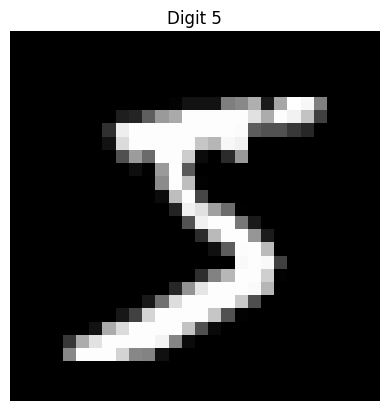

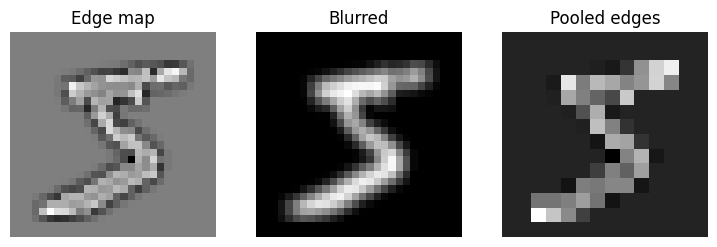

In [9]:
# Setup
import torch, torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets, transforms

torch.manual_seed(42)

# Load a sample image (MNIST digit)
transform = transforms.Compose([transforms.ToTensor()])
dataset = datasets.MNIST(root="data", train=True, download=True, transform=transform)
img, label = dataset[0]
img = img.unsqueeze(0)  # add batch dimension

print("Label:", label)
plt.imshow(img[0,0], cmap="gray"); plt.title(f"Digit {label}"); plt.axis("off")
plt.show()

# Define some simple filters
edge_filter = torch.tensor([[-1,-1,-1],
                            [-1, 8,-1],
                            [-1,-1,-1]], dtype=torch.float32).unsqueeze(0).unsqueeze(0)

blur_filter = torch.ones((1,1,3,3)) / 9.0

# Apply convolution with padding
edge_out = F.conv2d(img, edge_filter, padding=1)
blur_out = F.conv2d(img, blur_filter, padding=1)

# Apply max pooling
pooled = F.max_pool2d(edge_out, kernel_size=2, stride=2)

# Visualize
fig, axs = plt.subplots(1,3, figsize=(9,3))
axs[0].imshow(edge_out[0,0].detach(), cmap="gray"); axs[0].set_title("Edge map")
axs[1].imshow(blur_out[0,0].detach(), cmap="gray"); axs[1].set_title("Blurred")
axs[2].imshow(pooled[0,0].detach(), cmap="gray"); axs[2].set_title("Pooled edges")
for ax in axs: ax.axis("off")
plt.show()


1) Core (10–15 min)

Task: Change the stride in the convolution from 1 to 2.

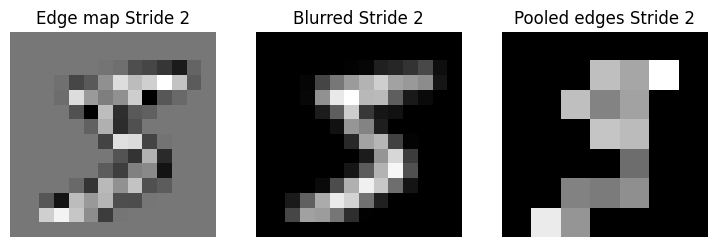

In [4]:
# Apply convolution with padding
edge_out_st2 = F.conv2d(img, edge_filter, stride=2, padding=1)
blur_out_st2 = F.conv2d(img, blur_filter, stride=2, padding=1)

# Apply max pooling
pooled_st2 = F.max_pool2d(edge_out, kernel_size=2, stride=2)

# Visualize
fig, axs = plt.subplots(1,3, figsize=(9,3))
axs[0].imshow(edge_out_st2[0,0].detach(), cmap="gray"); axs[0].set_title("Edge map Stride 2")
axs[1].imshow(blur_out_st2[0,0].detach(), cmap="gray"); axs[1].set_title("Blurred Stride 2")
axs[2].imshow(pooled_st2[0,0].detach(), cmap="gray"); axs[2].set_title("Pooled edges Stride 2")
for ax in axs: ax.axis("off")
plt.show()

2) Practice (10–15 min)

Task: Try different kernel sizes (e.g., 5×5 blur filter).

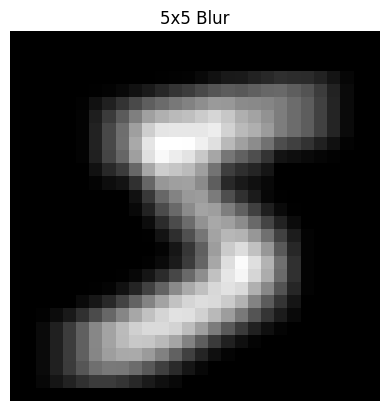

In [ ]:
blur5 = torch.ones((1,1,5,5)) / 25
blur5_out = F.conv2d(img, blur5, padding=2)
plt.imshow(blur5_out[0,0].detach(), cmap="gray"); plt.title("5x5 Blur")
plt.axis("off"); plt.show()


3) Stretch (optional, 10–15 min)

Task: Create a custom “sharpen” filter and compare output to the edge filter.

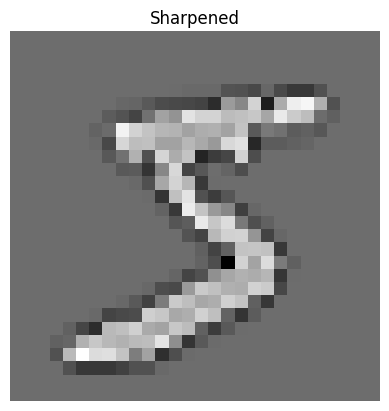

In [ ]:
sharpen = torch.tensor([[0,-1,0],
                        [-1,5,-1],
                        [0,-1,0]], dtype=torch.float32).unsqueeze(0).unsqueeze(0)
sharp_out = F.conv2d(img, sharpen, padding=1)
plt.imshow(sharp_out[0,0].detach(), cmap="gray"); plt.title("Sharpened")
plt.axis("off"); plt.show()


Mini-Challenge (≤40 min)

Task:
Build a notebook that:

Loads 5 random MNIST digits.

Applies edge detection, blur, and pooling.

Plots input + 3 outputs in a grid.

Acceptance Criteria:

At least 5 digits shown.

Each has its original, edge, blur, and pooled edge maps.

Short note: Which transformation seems most useful for digit recognition?

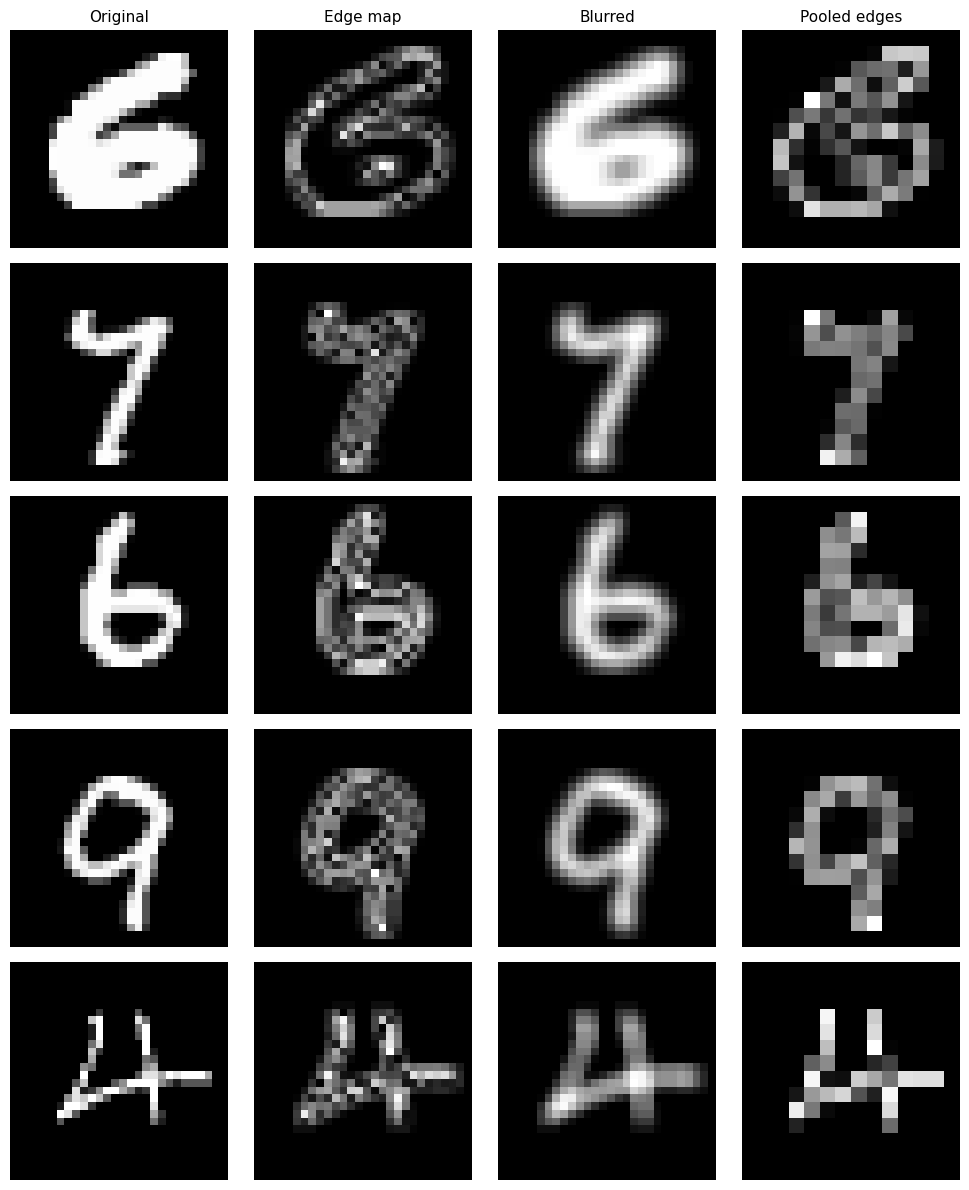

Note: Edge maps highlight strokes critical for digit shapes; pooling shrinks them while keeping strong responses, adding small-shift invariance. Blur removes detail and is usually less helpful for recognition than edges/pooled-edges.


In [ ]:
# Setup
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from pathlib import Path
np.random.seed(42)
plt.rcParams["figure.figsize"] = (6,4)
plt.rcParams["axes.grid"] = True

import torch, torch.nn.functional as F
from torchvision import datasets, transforms

torch.manual_seed(42)

# --- Load MNIST & pick 5 random digits ---
tfm = transforms.Compose([transforms.ToTensor()])
ds = datasets.MNIST(root="data", train=True, download=True, transform=tfm)
idxs = torch.randperm(len(ds))[:5]  # 5 random examples

# --- Define filters (3x3) ---
edge = torch.tensor([[-1,-1,-1],
                     [-1, 8,-1],
                     [-1,-1,-1]], dtype=torch.float32).view(1,1,3,3)  # Laplacian
blur = torch.ones((1,1,3,3), dtype=torch.float32) / 9.0               # Box blur

# --- Prepare figure: 5 rows x 4 cols (orig, edge, blur, pooled-edge) ---
fig, axs = plt.subplots(5, 4, figsize=(10, 12))
titles = ["Original", "Edge map", "Blurred", "Pooled edges"]

for c, t in enumerate(titles):
    axs[0, c].set_title(t, fontsize=11)

for r, i in enumerate(idxs):
    img, label = ds[i]            # img: (1,28,28) in [0,1]
    x = img.unsqueeze(0)          # (1,1,28,28) add batch

    # Convs (padding=1 keeps 28x28)
    edge_out = F.conv2d(x, edge, padding=1)           # (1,1,28,28)
    blur_out = F.conv2d(x, blur, padding=1)           # (1,1,28,28)
    pooled   = F.max_pool2d(edge_out, 2, 2)           # (1,1,14,14)

    # For nicer display of edges, take absolute value
    e = edge_out[0,0].detach().abs()
    b = blur_out[0,0].detach()
    p = pooled[0,0].detach().abs()

    # Plot row
    axs[r,0].imshow(img[0], cmap="gray"); axs[r,0].set_ylabel(f"Digit {label}")
    axs[r,1].imshow(e, cmap="gray")
    axs[r,2].imshow(b, cmap="gray")
    axs[r,3].imshow(p, cmap="gray")

for ax in axs.flat: ax.axis("off")
plt.tight_layout(); plt.show()



Edge maps highlight strokes critical for digit shapes; pooling shrinks them "
      "while keeping strong responses, adding small-shift invariance. Blur removes detail "
      "and is usually less helpful for recognition than edges/pooled-edges.



* **Edge detection filter** → highlights where pixel values change sharply (the *strokes* of the digit).
  *Output looks like just the outlines.*

* **Blur filter** → averages pixels with neighbors, washing out fine details.
  *Digit looks smoother, less sharp.*

* **Pooled edges** → you first detect edges, then apply pooling (like 2×2 max pooling).

  * This makes the edge map **smaller** (downsampled).
  * It keeps only the strongest edge responses.
  * Useful because it reduces resolution but keeps the essential structure (e.g. the “5” shape is still visible).

---

### Why pooling matters

Pooling isn’t about blurring — it’s about **compression + robustness**:

* If the digit shifts a bit left/right, pooled features barely change.
* CNNs rely on this: pooling gives **translation invariance** (a “5” is still a “5” no matter where it is).

---

👉 So to summarize:

* **Edge map**: shows strokes/features.
* **Blur**: removes detail (not very helpful for recognition).
* **Pooled edges**: keeps strongest stroke info, but in smaller size → efficient and invariant.

That’s why for digit recognition, **edge + pooled edges** are more useful than blur.



Notes / Key Takeaways

Convolutions detect local features (edges, corners).

Pooling reduces size while preserving important patterns.

Stride controls “how much you skip” each step.

Padding prevents shrinking outputs too fast.

Custom kernels = handcrafted feature detectors.

Learned filters in CNNs work the same way, just optimized via training.

Reflection

Why might pooling help a CNN generalize better?

What’s the tradeoff between using stride > 1 vs. pooling?



### 🔹 Why might pooling help a CNN generalize better?

* **Removes small details/noise**: pooling keeps the strongest activations, ignores tiny variations.
* **Translation invariance**: a digit shifted 1–2 pixels still produces similar pooled maps → model doesn’t overfit to exact positions.
* **Smaller feature maps**: fewer parameters in later layers, less risk of overfitting.

---

### 🔹 Tradeoff: stride > 1 vs. pooling

Both reduce spatial size, but they’re different:

**Stride > 1 in convolution**

* Shrinks the map while applying a filter.
* Good for efficiency.
* But you may lose fine-grained info since reduction happens immediately during convolution.

**Pooling**

* First apply convolution → extract features clearly.
* Then pool → compress while keeping strongest signals.
* Gives more control (you can choose pooling type like max, avg).

👉 In practice:

* Strided convolutions = learnable downsampling.
* Pooling = fixed downsampling (less flexible but adds stability).
* Modern CNNs often **replace pooling with strided convs** for flexibility, but pooling is still common for its simplicity and robustness.
